In [15]:
import os
from snf import datasets
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
% matplotlib inline 
import numpy as np
import snf
import networkx as nx
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


In [26]:
import warnings
warnings.simplefilter('ignore')

In [2]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'labels'])

In [3]:
for arr in digits.data:
    print(arr.shape)

(600, 76)
(600, 240)
(600, 216)
(600, 47)


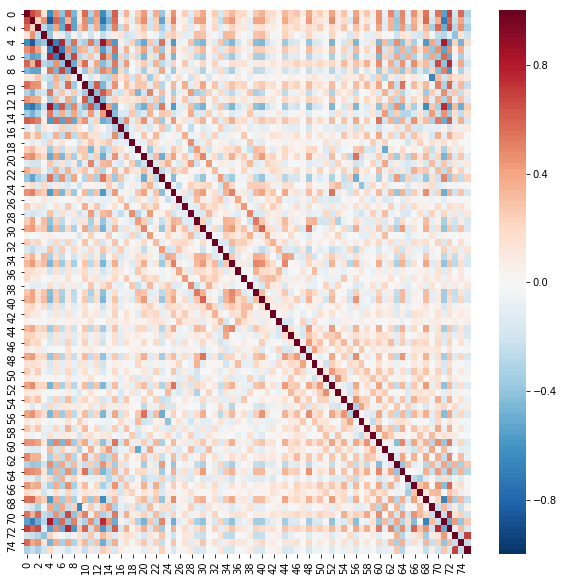

In [4]:
df = pd.DataFrame(digits.data[0])

plt.rcParams['figure.figsize'] = (10, 10)
sns.heatmap(df.corr(), 
            vmin=-1, vmax=1,
            cmap=sns.color_palette("RdBu_r", 100));

In [5]:
groups, samples = np.unique(digits.labels, return_counts=True)
for grp, count in zip(groups, samples):
    print('Group {:.0f}: {} samples'.format(grp, count))

Group 0: 200 samples
Group 1: 200 samples
Group 2: 200 samples


In [6]:
affinity_networks = snf.make_affinity(digits.data, metric='euclidean', K=20, mu=0.5)

In [7]:
fused_network = snf.snf(affinity_networks, K=20)

In [8]:
best, second = snf.get_n_clusters(fused_network)
best, second

(3, 2)

In [9]:
affinity_networks[0]

array([[0.18617796, 0.00340809, 0.00468718, ..., 0.00181746, 0.0021009 ,
        0.0018386 ],
       [0.00340809, 0.18961817, 0.01424051, ..., 0.00081597, 0.00084233,
        0.00092379],
       [0.00468718, 0.01424051, 0.1747366 , ..., 0.00082906, 0.0010653 ,
        0.00105952],
       ...,
       [0.00181746, 0.00081597, 0.00082906, ..., 0.15770303, 0.00722016,
        0.00303869],
       [0.0021009 , 0.00084233, 0.0010653 , ..., 0.00722016, 0.15597937,
        0.00758259],
       [0.0018386 , 0.00092379, 0.00105952, ..., 0.00303869, 0.00758259,
        0.1640929 ]])

In [10]:
fused_network

array([[5.57149656e-01, 4.45961825e-03, 4.31131465e-03, ...,
        1.30417738e-04, 1.11812794e-04, 1.71489830e-04],
       [4.45961825e-03, 5.57491211e-01, 5.18360724e-03, ...,
        1.33297048e-04, 1.12474158e-04, 1.79473577e-04],
       [4.31131465e-03, 5.18360724e-03, 5.57005640e-01, ...,
        1.28992762e-04, 1.07519663e-04, 1.77492231e-04],
       ...,
       [1.30417738e-04, 1.33297048e-04, 1.28992762e-04, ...,
        5.54824831e-01, 2.92642775e-03, 3.29185955e-03],
       [1.11812794e-04, 1.12474158e-04, 1.07519663e-04, ...,
        2.92642775e-03, 5.55344505e-01, 3.60456328e-03],
       [1.71489830e-04, 1.79473577e-04, 1.77492231e-04, ...,
        3.29185955e-03, 3.60456328e-03, 5.56986518e-01]])

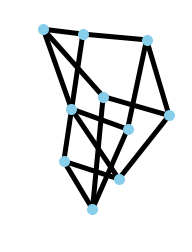

In [34]:
G = nx.petersen_graph()
plt.subplot(121)

nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

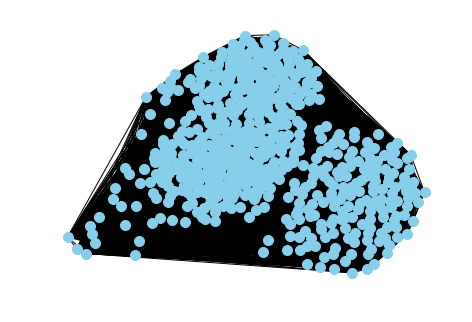

In [39]:
# adj = np.random.randint(2, size=(10,10))
G = nx.from_numpy_matrix(affinity_networks[3])
nx.draw(G,
        with_labels=False, 
        node_size=100,
        node_color='skyblue',
        width=1)

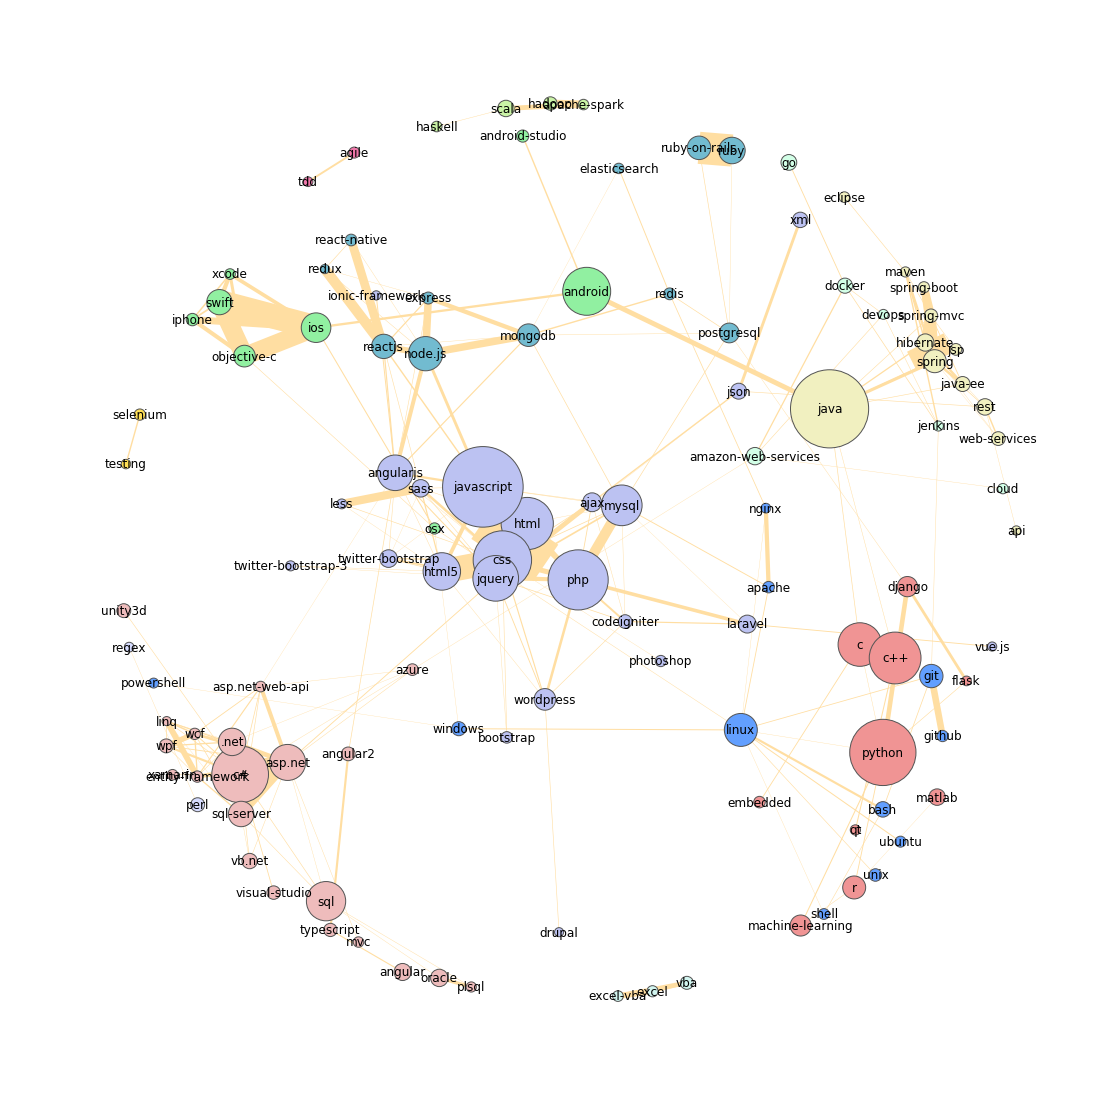

In [110]:
G = nx.Graph(day="Stackoverflow")
df_nodes = pd.read_csv('stack_network_nodes.csv')
df_edges = pd.read_csv('stack_network_links.csv')
df_nodes.head()

for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])
    
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
         7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
         13:'#d6dcff', 14:'#d2f5f0'} 

plt.figure(figsize=(15, 15))
options = {
    'edge_color': '#FFDEA2',
    'with_labels': True,
    'font_weight': 'regular',
}
colors = [color_map[G.node[node]['group']] for node in G]
sizes = [G.node[node]['nodesize']*10 for node in G]

weights = nx.get_edge_attributes(G,'weight').values()
width = [(weight/30)**3 for weight in weights]

# Using the spring layout : 
# - k controls the distance between the nodes and varies between 0 and 1
# - iterations is the number of times simulated annealing is run
# default k=0.1 and iterations=50

pos=nx.spring_layout(G, k=0.25, iterations=50)
nx.draw(G, node_color=colors, node_size=sizes, pos=pos, width=width, **options)

ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()

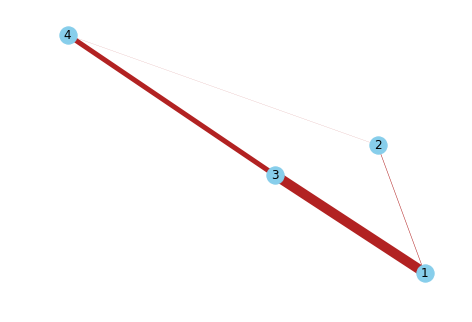

In [126]:
GG = nx.Graph()
GG.add_node(1, pos=(1,1))
GG.add_node(2, pos=(2,2))
GG.add_node(3, pos=(1,0))
GG.add_node(4, pos=(0,2))
GG.add_edge(1, 2, weight=0.5)
GG.add_edge(1, 3, weight=9.8)
GG.add_edge(3, 4, weight=5.0)
GG.add_edge(2, 4, weight=0.1)


weights = nx.get_edge_attributes(GG,'weight').values()
width = [weight for weight in weights]

# pos = nx.get_node_attributes(GG,'pos')
pos = nx.spring_layout(GG, k=0.25, iterations=50)
nx.draw(GG, pos=pos, width=width, with_labels=True, node_color='skyblue', edge_color='firebrick')